In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-H1_1_1835.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_27_alphadia_mDIA_synchroPasef'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:00.949816  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_umnph3c6. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 379,334,533,120
0:00:00.961235  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:00.961573  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)


#test_lib.precursor_df.elution_group_idx = np.arange(len(test_lib.precursor_df))

In [3]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 40,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                    'HybridCandidateConfig': {
                        'sigma_scale_rt': 0.5,
                    }
                }
            }
        )
plan.from_spec_lib_base(test_lib)

#plan.run(output_location, keep_decoys=True, fdr=1.0, neptune_token=neptune_token, neptune_tags='scp')

for dia_data, precursors_flat, fragments_flat in plan.get_run_data():

    break
    

0:00:05.186597  PROGRESS:       _   _      _         ___ ___   _   
0:00:05.187004  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:05.187311  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:05.187590  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:05.187864  PROGRESS:            |_|                            
0:00:05.188224  PROGRESS: 
0:00:05.188813  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:05.194837  INFO: Applying config update from dict
0:00:05.195206  PROGRESS: version: 1.0.2
0:00:05.195485  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:05.195662  PROGRESS: date: 2023-05-02 14:30:10
0:00:08.979855  INFO: renaming precursor_columns columns
0:00:08.980894  INFO: renaming fragment_columns columns
0:00:08.981391  INFO: ========= Library Stats =========
0:00:08.981633  INFO: Number of precursors: 229,333
0:00:09.012321  INFO: 	thereof targets:183,468
0:00:09.01

0:00:39.887509  INFO: found 2 calibration groups
0:00:39.887941  INFO: (fragment) found 1 estimator(s)
0:00:39.888194  INFO: (precursor) found 3 estimator(s)
0:00:39.892203  INFO: calibration group: precursor, predicting mz
0:00:39.892464  WARNING: mz prediction was skipped as it has not been fitted yet
0:00:39.892636  INFO: calibration group: precursor, predicting rt
0:00:39.892825  WARNING: rt prediction was skipped as it has not been fitted yet
0:00:39.893064  INFO: calibration group: precursor, predicting mobility
0:00:39.893445  WARNING: mobility prediction was skipped as it has not been fitted yet
0:00:39.893712  INFO: calibration group: fragment, predicting mz
0:00:39.893966  WARNING: mz prediction was skipped as it has not been fitted yet
0:00:39.894219  PROGRESS: === Epoch 0, step 0, extracting elution groups 0 to 4000 ===
0:00:39.897052  PROGRESS: MS1 error: 30, MS2 error: 30, RT error: 240, Mobility error: 0.08
0:00:45.969389  INFO: Duty cycle consists of 9 frames, 0.96 seco

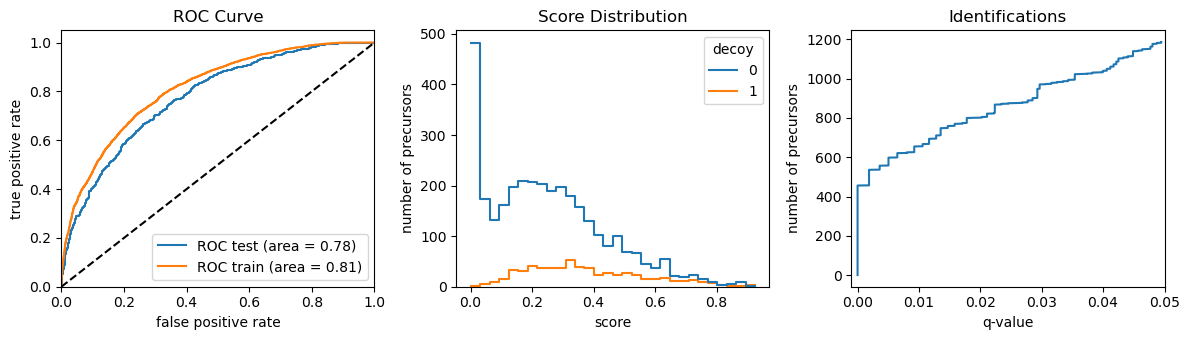

0:04:52.209327  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:04:52.212316  PROGRESS: Accumulated precursors: 3,899, 0.01 FDR: 656, 0.001 FDR: 457
0:04:52.213031  INFO: calibration group: precursor, fitting mz estimator 


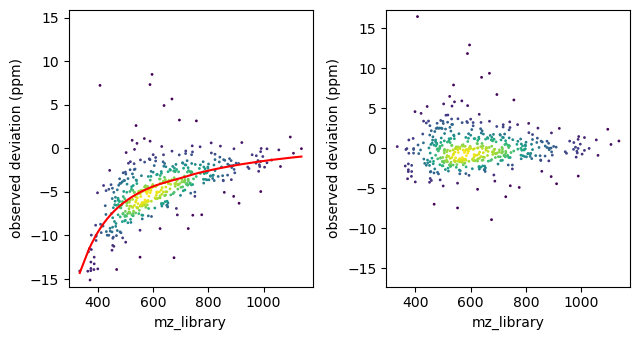

0:04:52.304572  INFO: calibration group: precursor, fitting rt estimator 


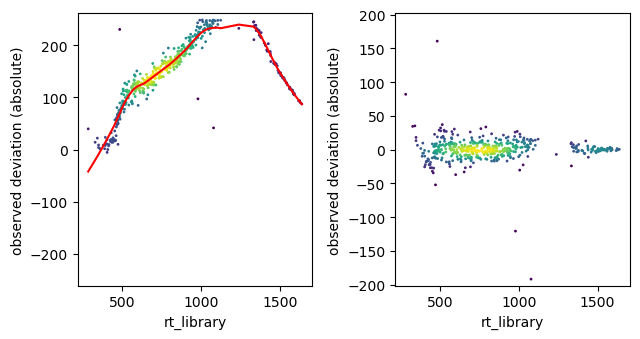

0:04:52.397514  INFO: calibration group: precursor, fitting mobility estimator 


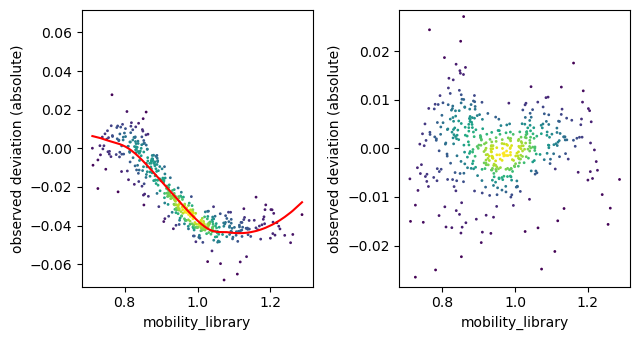

0:04:52.492616  INFO: calibration group: fragment, fitting mz estimator 


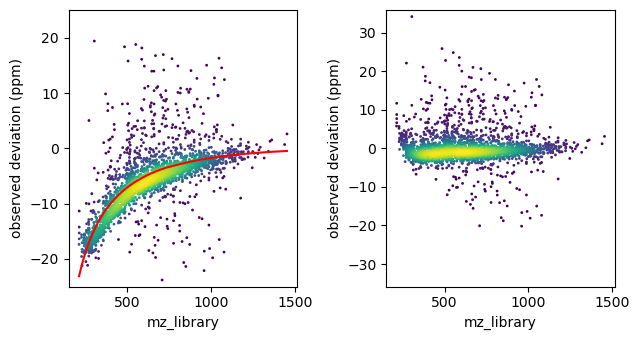

0:04:52.652837  INFO: calibration group: precursor, predicting mz
0:04:52.661748  INFO: calibration group: precursor, predicting rt
0:04:52.689950  INFO: calibration group: precursor, predicting mobility
0:04:52.702346  INFO: calibration group: fragment, predicting mz
0:04:53.033720  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:04:53.038358  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:04:59.844133  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:59.844543  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:59.844764  INFO: FWHM in RT is 4.85 seconds, sigma is 2.14
0:04:59.844969  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 5.99
100%|██████████| 12648/12648 [00:01<00:00, 10397.21it/s]
0:05:28.897045  INFO: Scored 12648 candidates
0:05:28.902676  INFO: 2.06% of targets failed, 4.85% of decoys failed
0:05:28.996645  INFO: number of dfs in features: 1, total number of features: 12212


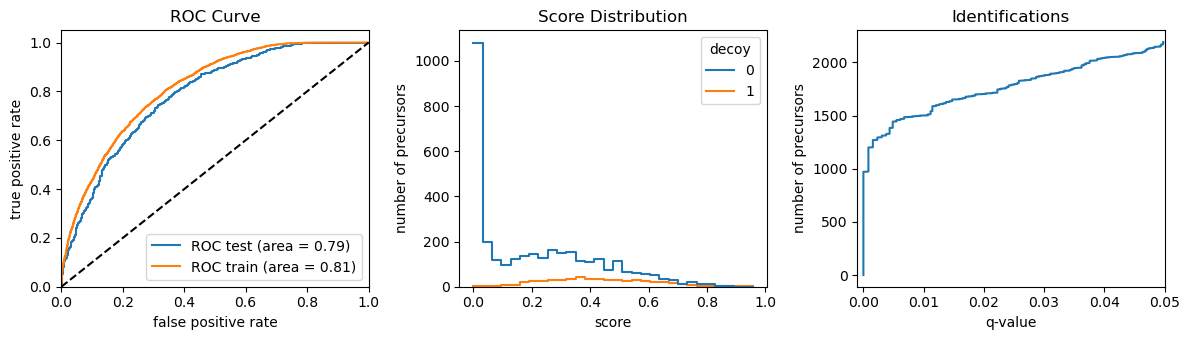

0:05:29.611759  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:05:29.612228  PROGRESS: Accumulated precursors: 3,908, 0.01 FDR: 1,501, 0.001 FDR: 1,201
0:05:29.613081  INFO: calibration group: precursor, fitting mz estimator 


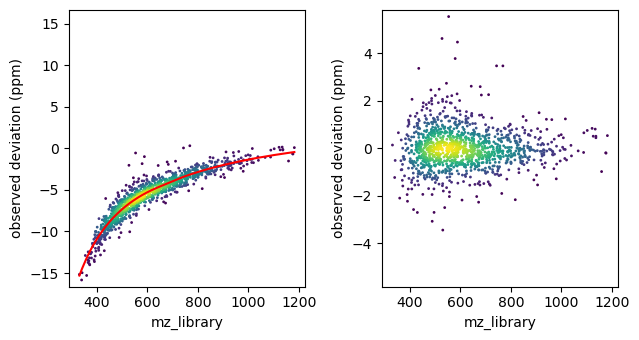

0:05:29.725777  INFO: calibration group: precursor, fitting rt estimator 


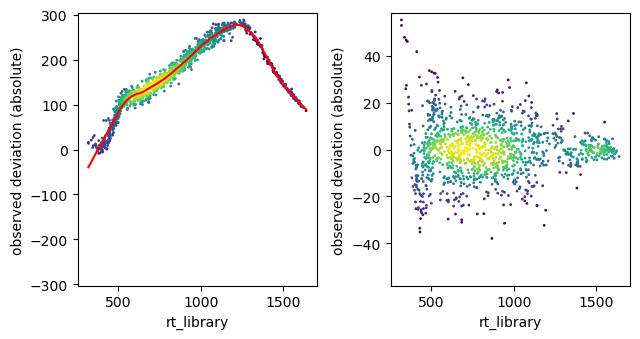

0:05:30.060972  INFO: calibration group: precursor, fitting mobility estimator 


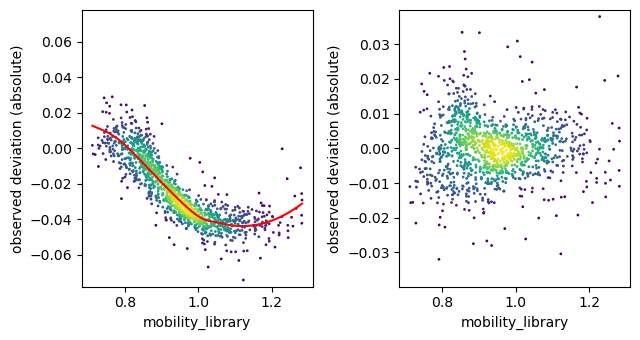

0:05:30.175683  INFO: calibration group: fragment, fitting mz estimator 


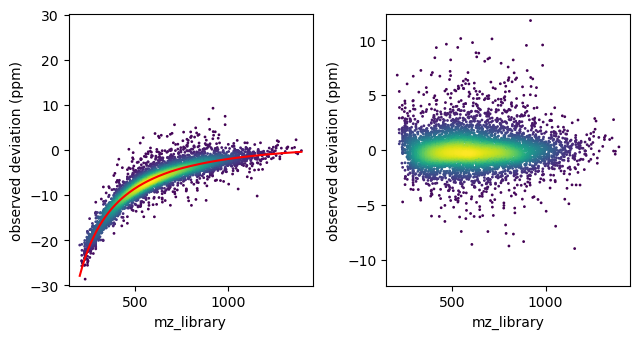

0:05:30.588226  INFO: calibration group: precursor, predicting mz
0:05:30.599131  INFO: calibration group: precursor, predicting rt
0:05:30.630347  INFO: calibration group: precursor, predicting mobility
0:05:30.646652  INFO: calibration group: fragment, predicting mz
0:05:30.976784  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:05:30.981190  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:05:37.888505  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:05:37.888913  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:05:37.889247  INFO: FWHM in RT is 4.81 seconds, sigma is 2.13
0:05:37.889434  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.77
100%|██████████| 12331/12331 [00:01<00:00, 10380.77it/s]
0:06:06.780581  INFO: Scored 12331 candidates
0:06:06.785341  INFO: 1.74% of targets failed, 4.84% of decoys failed
0:06:06.876388  INFO: number of dfs in features: 1, total number of features: 11926


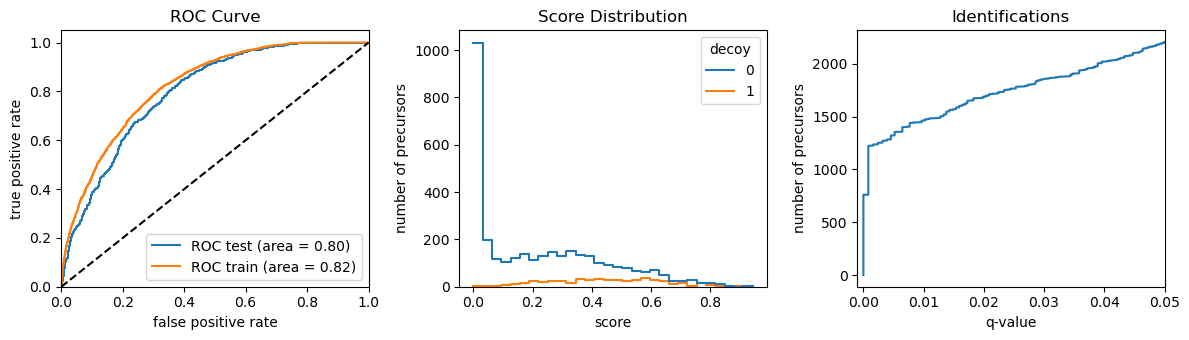

0:06:07.547787  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:06:07.548174  PROGRESS: Accumulated precursors: 3,882, 0.01 FDR: 1,462, 0.001 FDR: 1,224
0:06:07.549126  INFO: calibration group: precursor, fitting mz estimator 


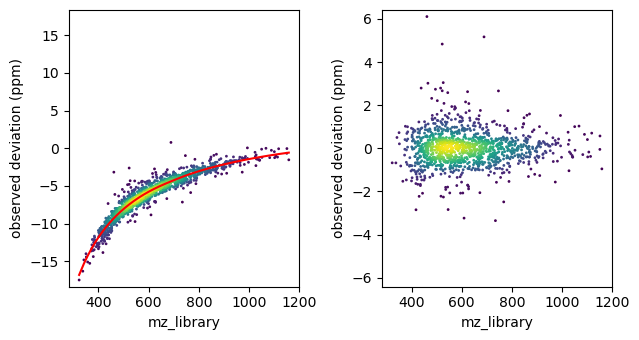

0:06:07.662162  INFO: calibration group: precursor, fitting rt estimator 


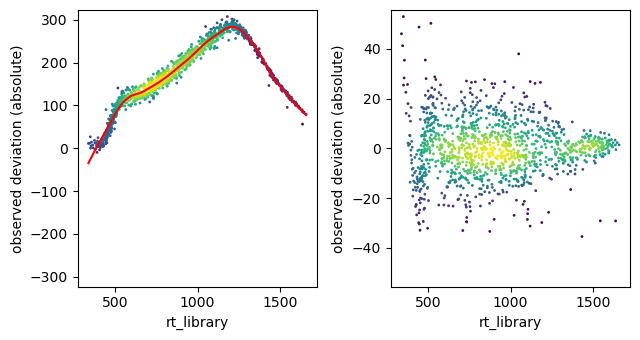

0:06:07.776189  INFO: calibration group: precursor, fitting mobility estimator 


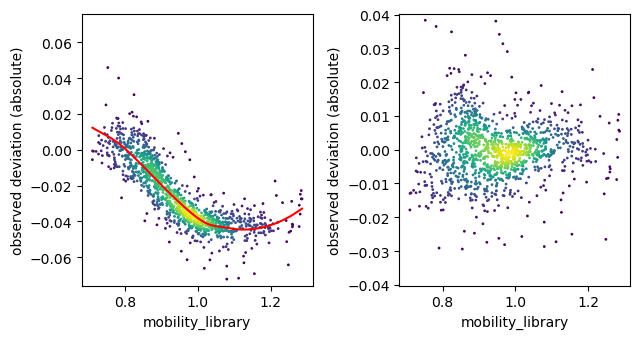

0:06:07.896281  INFO: calibration group: fragment, fitting mz estimator 


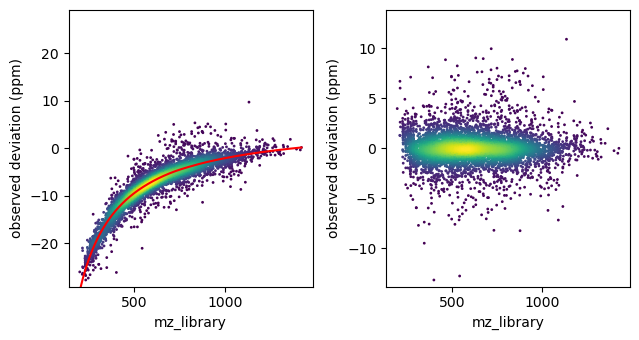

0:06:08.302690  INFO: calibration group: precursor, predicting mz
0:06:08.313417  INFO: calibration group: precursor, predicting rt
0:06:08.341361  INFO: calibration group: precursor, predicting mobility
0:06:08.353971  INFO: calibration group: fragment, predicting mz
0:06:08.664370  INFO: calibration group: precursor, predicting mz
0:06:08.677283  INFO: calibration group: precursor, predicting rt
0:06:08.706214  INFO: calibration group: precursor, predicting mobility
0:06:08.717827  INFO: calibration group: fragment, predicting mz


In [4]:
reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

workflow = Workflow(
    plan.config, 
    dia_data, 
    reference_flat, 
    fragments_flat
)

workflow.calibration()


In [5]:
d0_df = workflow.extraction()

0:06:15.458821  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:06:23.055284  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:06:23.055707  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:06:23.055952  INFO: FWHM in RT is 4.69 seconds, sigma is 2.08
0:06:23.056130  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.69
 29%|██▉       | 26706/91731 [01:07<03:06, 348.93it/s]

<AxesSubplot:>

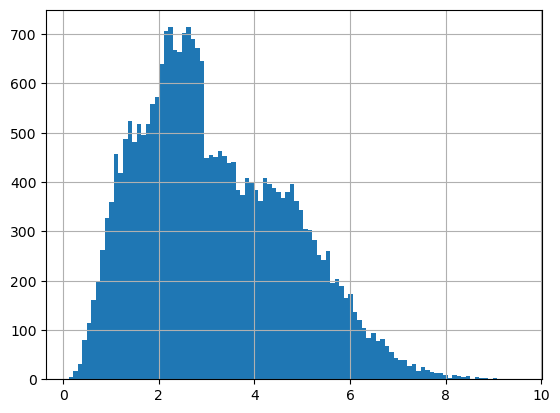

In [22]:
d0_df[d0_df['qval'] <=0.01]['fwhm_rt'].hist(bins=100)

In [13]:
d0_df.columns

Index(['precursor_idx', 'elution_group_idx', 'charge', 'rank', 'scan_start',
       'scan_stop', 'scan_center', 'frame_start', 'frame_stop', 'frame_center',
       'precursor_mass_error', 'mz_library', 'mz_observed',
       'precursor_isotope_correlation', 'sum_precursor_intensity',
       'n_fragments_matched', 'n_fragments', 'fraction_fragments',
       'intensity_correlation', 'sum_fragment_intensity',
       'mean_fragment_intensity', 'mean_fragment_nonzero', 'n_observations',
       'mean_observation_score', 'var_observation_score', 'fragment_coverage',
       'fragment_scan_correlation', 'fragment_frame_correlation',
       'template_scan_correlation', 'template_frame_correlation', 'fwhm_rt',
       'fwhm_mobility', 'sum_b_ion_intensity', 'sum_y_ion_intensity',
       'observed_difference_b_y', 'expected_difference_b_y', 'aggreement_b_y',
       'base_width_mobility', 'base_width_rt', 'rt_observed',
       'mobility_observed', 'decoy', 'mz_calibrated', 'rt_library',
       'rt_ca

In [14]:
d0_df['fwhm_mobility'].median()

0.0070553007535636425

In [8]:
cycle_length_seconds = 0.39
sigma_scale_rt = 0.2
fwhm_rt = 10
sigma = fwhm_rt / 2.3548
sigma_scaled = sigma * sigma_scale_rt / cycle_length_seconds


sigma_scaled

2.1777667437596095

In [169]:
workflow.calibration_manager.predict(precursors_flat, 'precursor')
workflow.calibration_manager.predict(fragments_flat, 'fragment')

2:23:10.681913  INFO: calibration group: precursor, predicting mz
2:23:10.704160  INFO: calibration group: precursor, predicting rt
2:23:10.763410  INFO: calibration group: precursor, predicting mobility
2:23:10.790453  INFO: calibration group: fragment, predicting mz


In [170]:
precursors_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.precursors_flat.tsv', sep='\t', index=False)
fragments_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.fragments_flat.tsv', sep='\t', index=False)

In [165]:
precursors_flat

,elution_group_idx,precursor_idx,decoy,flat_frag_start_idx,flat_frag_stop_idx,charge,rt_library,mobility_library,mz_library,sequence,...,i_1,i_2,i_3,i_4,i_5,nAA,raw_name,mz_calibrated,rt_calibrated,mobility_calibrated
0,0,0,0,0,6,2,881.937548,0.770291,402.242340,FSPVLGR,...,0.285548,0.074148,0.014007,0.002118,0.000000,7,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,402.237163,998.724245,0.778201
1,3180,3,0,1204269,1204276,2,734.373443,0.780428,380.267066,APGIIPR,...,0.274394,0.066189,0.011620,0.001632,0.000000,7,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,380.261698,817.137595,0.786982
2,3180,2,0,622286,622293,2,734.373443,0.780428,378.257434,APGIIPR,...,0.274394,0.066189,0.011620,0.001632,0.000000,7,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,378.252049,817.137595,0.786982
3,3180,1,0,40303,40310,2,734.373443,0.780428,376.244882,APGIIPR,...,0.274394,0.066189,0.011620,0.001632,0.000000,7,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,376.239479,817.137595,0.786982
4,32481,4,0,995005,995012,2,649.689020,0.847025,441.275133,LEADLEK,...,0.284730,0.080972,0.017144,0.002958,0.000000,7,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,441.270281,717.138957,0.842703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229328,5788,229325,1,2909814,2909846,4,496.130258,1.120423,939.208835,ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK,...,0.260841,0.256465,0.177225,0.096112,0.043393,49,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,939.207349,517.340106,1.084017
229329,5788,229328,0,1237721,1237753,4,496.130258,1.120423,936.223195,AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK,...,0.260841,0.256465,0.177225,0.096112,0.043393,49,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,936.221692,517.340106,1.084017
229330,5788,229329,0,1819704,1819736,4,496.130258,1.120423,938.237296,AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK,...,0.260841,0.256465,0.177225,0.096112,0.043393,49,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,938.235805,517.340106,1.084017
229331,5785,229331,0,1819646,1819665,5,497.019212,1.095016,750.791292,AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK,...,0.260841,0.256465,0.177225,0.096112,0.043393,49,20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...,750.788646,518.716495,1.059088


In [69]:
d0_df.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d.tsv', sep='\t')

In [171]:
synchropasef = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d.tsv', sep='\t')
diapasef = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d.tsv', sep='\t')

In [172]:
diapasef = diapasef[diapasef['qval'] <= 0.01].copy()
synchropasef = synchropasef[synchropasef['qval'] <= 0.01].copy()

In [173]:
diapasef.columns

Index(['Unnamed: 0', 'precursor_idx', 'elution_group_idx', 'charge', 'rank',
       'scan_start', 'scan_stop', 'scan_center', 'frame_start', 'frame_stop',
       'frame_center', 'precursor_mass_error', 'mz_library', 'mz_observed',
       'precursor_isotope_correlation', 'sum_precursor_intensity',
       'n_fragments_matched', 'n_fragments', 'fraction_fragments',
       'intensity_correlation', 'sum_fragment_intensity',
       'mean_fragment_intensity', 'mean_fragment_nonzero', 'n_observations',
       'mean_observation_score', 'var_observation_score', 'fragment_coverage',
       'fragment_scan_correlation', 'fragment_frame_correlation',
       'template_scan_correlation', 'template_frame_correlation', 'fwhm_rt',
       'fwhm_mobility', 'sum_b_ion_intensity', 'sum_y_ion_intensity',
       'observed_difference_b_y', 'expected_difference_b_y', 'aggreement_b_y',
       'base_width_mobility', 'base_width_rt', 'rt_observed',
       'mobility_observed', 'decoy', 'mz_calibrated', 'rt_library',

In [178]:

df = diapasef[['precursor_idx','sum_y_ion_intensity','fwhm_rt']].merge(synchropasef[['precursor_idx','sum_y_ion_intensity','fwhm_rt']], on='precursor_idx', suffixes=['_dia','_synchro'], how='inner')

(0.0, 8.0)

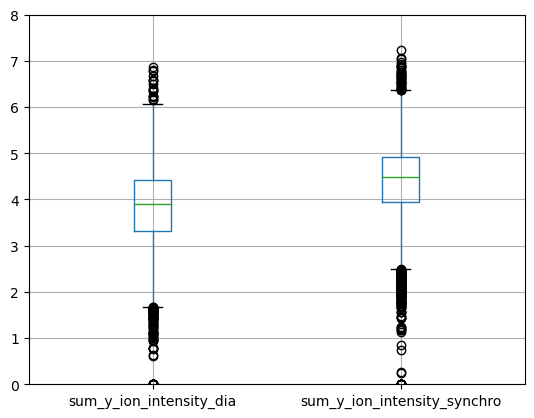

In [179]:
df.boxplot(column=['sum_y_ion_intensity_dia','sum_y_ion_intensity_synchro'])
plt.ylim(0,8)

In [180]:
np.median(df['sum_y_ion_intensity_dia'] - df['sum_y_ion_intensity_synchro'])

-0.5524538755416872

In [182]:
10**(0.5)

3.1622776601683795

In [40]:
from alphadia.extraction import scoring

In [183]:
output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_20_multiplexing'
d0_df.to_csv(os.path.join(output_location, 'd0_df.tsv'), sep='\t')

In [3]:
d0_df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_20_multiplexing/d0_df.tsv', sep='\t', index_col=0)

In [184]:
d0_df = d0_df[d0_df['qval'] <= 0.01]

In [185]:
d0_df_sig = d0_df[d0_df['elution_group_idx'].isin(d0_df[d0_df['qval'] <= 0.01]['elution_group_idx'])].copy()
#d0_df_sig = d0_df_sig[d0_df_sig['sum_precursor_intensity'] > np.median(d0_df_sig['sum_precursor_intensity'].values)].copy()

In [186]:
print(len(d0_df_sig))

28133


In [187]:
d0_df_sig.sort_values('elution_group_idx', inplace=True)

In [188]:
precursors_mod = precursors_flat.copy()
#precursors_mod = precursors_mod[precursors_mod['decoy'] == 0].copy()

In [189]:
precursors_mod = precursors_mod[precursors_mod['elution_group_idx'].isin(d0_df_sig['elution_group_idx'])].copy()

In [190]:
d0_elution_group_idx = d0_df_sig['elution_group_idx'].values
channel_elution_group_idx = precursors_mod['elution_group_idx'].values
d0_lookup = np.searchsorted(d0_elution_group_idx, channel_elution_group_idx)

In [191]:
precursors_mod['rt_library'] = d0_df_sig['rt_observed'].values[d0_lookup]
precursors_mod['mobility_library'] = d0_df_sig['mobility_observed'].values[d0_lookup]
precursors_mod['scan_start'] = d0_df_sig['scan_start'].values[d0_lookup]
precursors_mod['scan_center'] = d0_df_sig['scan_center'].values[d0_lookup]
precursors_mod['scan_stop'] = d0_df_sig['scan_stop'].values[d0_lookup]
precursors_mod['frame_start'] = d0_df_sig['frame_start'].values[d0_lookup]
precursors_mod['frame_center'] = d0_df_sig['frame_center'].values[d0_lookup]
precursors_mod['frame_stop'] = d0_df_sig['frame_stop'].values[d0_lookup]
precursors_mod['sum_fragment_intensity'] = d0_df_sig['sum_fragment_intensity'].values[d0_lookup]

In [192]:
fragments_filtered = fragments_flat.copy()
fragments_filtered.loc[fragments_filtered['cardinality'] > 1, 'intensity'] = 0

In [193]:
workflow.calibration_manager.predict(precursors_mod, 'precursor')
workflow.calibration_manager.predict(fragments_filtered, 'fragment')

2:27:16.170287  INFO: calibration group: precursor, predicting mz
2:27:16.198295  INFO: calibration group: precursor, predicting rt
2:27:16.238674  INFO: calibration group: precursor, predicting mobility
2:27:16.260044  INFO: calibration group: fragment, predicting mz


In [194]:
candidates = precursors_mod[['elution_group_idx', 'precursor_idx', 'channel', 'decoy', 'mz_library','mz_calibrated', 'rt_library', 'mobility_library','rt_calibrated', 'mobility_calibrated', 'scan_start', 'scan_center', 'scan_stop', 'frame_start', 'frame_center', 'frame_stop','charge','sum_fragment_intensity']].copy()
candidates['score_group_idx'] = candidates['precursor_idx']
candidates['rank'] = 0

In [195]:
candidates.sort_values('sum_fragment_intensity', inplace=True, ascending=False)
candidates

,elution_group_idx,precursor_idx,channel,decoy,mz_library,mz_calibrated,rt_library,mobility_library,rt_calibrated,mobility_calibrated,scan_start,scan_center,scan_stop,frame_start,frame_center,frame_stop,charge,sum_fragment_intensity,score_group_idx,rank
82564,658,82565,4,0,621.366696,621.363142,858.533691,0.937931,968.904534,0.916930,506,560,610,7501,7543,7588,2,5.842618,82565,0
82612,658,82568,0,0,617.341592,617.338008,858.533691,0.937931,968.904534,0.916930,506,560,610,7501,7543,7588,2,5.842618,82568,0
82523,658,82612,12,0,629.414163,629.410669,858.533691,0.937931,968.904534,0.916930,506,560,610,7501,7543,7588,2,5.842618,82612,0
82565,658,82564,8,0,625.385959,625.382435,858.533691,0.937931,968.904534,0.916930,506,560,610,7501,7543,7588,2,5.842618,82564,0
82568,658,82523,0,1,601.355554,601.351848,858.533691,0.937931,968.904534,0.916930,506,560,610,7501,7543,7588,2,5.842618,82523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191555,11933,191549,0,1,663.934993,663.931757,283.949615,0.803448,262.499062,0.806388,760,768,777,2482,2491,2503,3,2.025306,191549,0
191661,11933,191556,12,0,671.983376,671.980199,283.949615,0.803448,262.499062,0.806388,760,768,777,2482,2491,2503,3,2.025306,191556,0
191612,11933,191661,4,0,666.618398,666.615182,283.949615,0.803448,262.499062,0.806388,760,768,777,2482,2491,2503,3,2.025306,191661,0
191549,11933,191555,0,0,663.934998,663.931762,283.949615,0.803448,262.499062,0.806388,760,768,777,2482,2491,2503,3,2.025306,191555,0


In [196]:
candidates['decoy'].sum()

28132

In [197]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_mod,
    fragments_filtered,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    fragment_mz_column='mz_calibrated',
    precursor_mz_column='mz_calibrated',
    rt_column='rt_calibrated',
    mobility_column='mobility_calibrated',
    debug=False
)
psm = scoring_workflow()

100%|██████████| 140664/140664 [00:13<00:00, 10511.72it/s]
2:29:18.474437  INFO: Scored 140664 candidates
2:29:18.521647  INFO: 2.43% of targets failed, 1.82% of decoys failed


In [233]:
psm_df, fragment_df = psm

In [241]:
psm_df.channel.value_counts()

0     27863
4     27735
8     27557
12    26642
Name: channel, dtype: int64

In [235]:
psm_df ['id'] = np.arange(len(psm_df))

In [236]:
psm_df = psm_df[(psm_df['decoy'] == 0) | (psm_df['channel'] == 12)].copy()

In [238]:
psm_df.loc[psm_df['channel'] == 12, 'decoy'] = 1

In [231]:
psm_df.replace([np.inf, -np.inf], np.nan, inplace=True)
psm_df.dropna(how="all", inplace=True)

In [225]:
psm_df = psm_df.dropna().reset_index(drop=True).copy()
print(len(psm_df))

57868


In [232]:
# calculate the number of NA values per column
for c in psm_df.columns:
    print(c, psm_df[c].isna().sum())

precursor_idx 0
elution_group_idx 0
charge 0
rank 0
scan_start 0
scan_stop 0
scan_center 0
frame_start 0
frame_stop 0
frame_center 0
precursor_mass_error 0
mz_library 0
mz_observed 0
precursor_isotope_correlation 0
sum_precursor_intensity 0
n_fragments_matched 0
n_fragments 0
fraction_fragments 0
intensity_correlation 0
sum_fragment_intensity 0
mean_fragment_intensity 0
mean_fragment_nonzero 0
n_observations 0
mean_observation_score 0
var_observation_score 0
fragment_coverage 0
fragment_scan_correlation 0
fragment_frame_correlation 0
template_scan_correlation 0
template_frame_correlation 0
fwhm_rt 0
fwhm_mobility 0
sum_b_ion_intensity 0
sum_y_ion_intensity 0
observed_difference_b_y 0
expected_difference_b_y 51929
aggreement_b_y 51929
base_width_mobility 0
base_width_rt 0
rt_observed 0
mobility_observed 0
decoy 0
mz_calibrated 0
rt_library 0
rt_calibrated 0
rt_error 0
mobility_library 0
mobility_calibrated 0
mobility_error 0
proteins 0
channel 0
id 0


54505


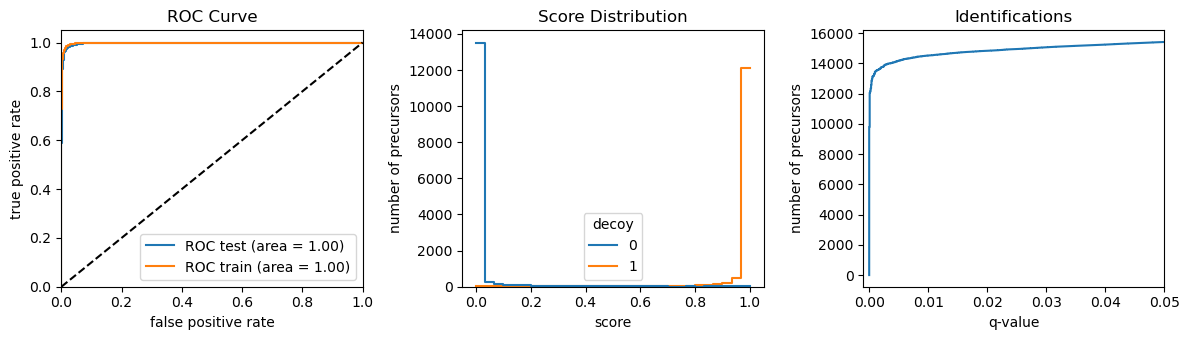

28596
(14384, 54)
3174
54377


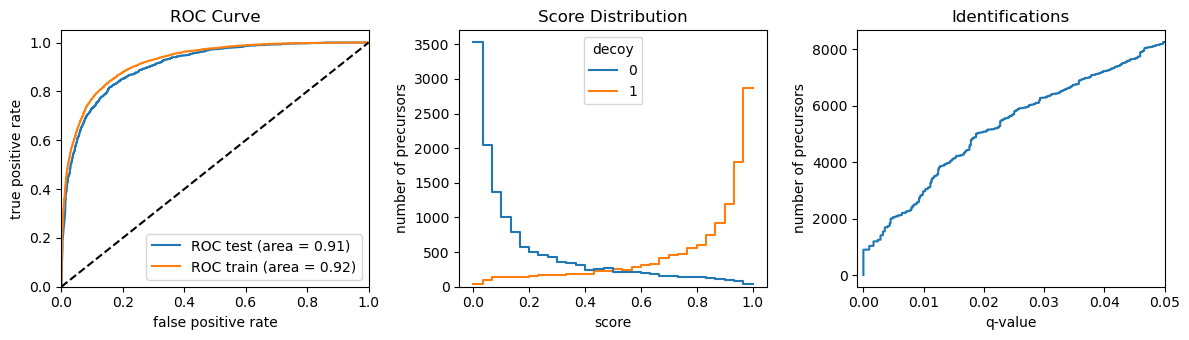

28511
(2934, 54)
1225
54199


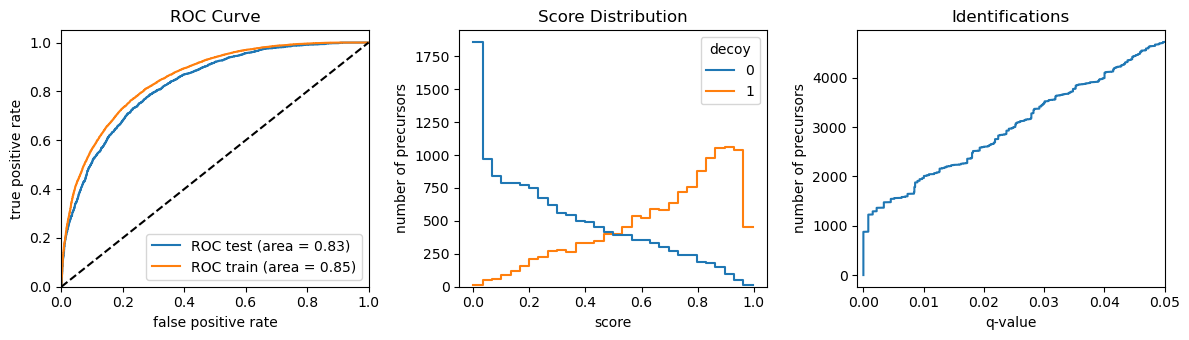

28388
(1948, 54)
818


In [240]:
from alphadia.extraction.scoring import fdr_correction

for channel in [0,4,8]:
    channel_psm_df = psm_df[psm_df['channel'].isin([channel, 12])]
    print(len(channel_psm_df))
    channel_psm_df = fdr_correction(channel_psm_df, index_group='id')
    print(len(channel_psm_df))
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)].shape)
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)]['proteins'].nunique())

In [75]:
d4_df_sig['proteins'].nunique()

1529

In [10]:
import time

performance = []

for mobility_window in [0.02, 0.03, 0.04, 0.05]:
    for rt_window in [10, 20, 30, 45, 60, 90, 120, 150, 180, 200, 250]:

        for i in range(10):

            config = hybridselection.HybridCandidateConfig()
            config.update({
                'rt_tolerance': rt_window,
                'mz_tolerance': 10.,
                'mobility_tolerance': mobility_window,
                'sigma_scale_rt': 0.5,
                'sigma_scale_mobility': 0.8,
                'f_mobility': 1.0,
                'f_rt': 0.95,
                'center_fraction': 0.01,
                'min_size_rt': 3,
                'candidate_count':3
            })

            start_time = time.time()
            selection = hybridselection.HybridCandidateSelection(
                dia_data,
                precursors_flat.sample(1000),
                fragments_flat,
                config.jitclass(),
                rt_tolerance=80,
                mz_tolerance=15,
                mobility_tolerance=0.05,
                candidate_count=1,
                thread_count=10,
                debug=False,
                group_channels=False,
                top_k_precursors=3,
                top_k_fragments=12,
                rt_column='rt_calibrated',
                precursor_mz_column='mz_calibrated',
                fragment_mz_column='mz_library',
                mobility_column='mobility_calibrated'
            )
            candidates = selection()
            stop_time = time.time()

            performance.append({
                'mobility_window': mobility_window,
                'rt_window': rt_window,
                'duration': stop_time - start_time
            })

0:17:21.478089  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:21.478498  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:21.478738  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:21.478967  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 8618.98it/s]
0:17:22.089936  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.090487  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.090732  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:22.090960  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 10741.94it/s]
0:17:22.487150  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.487524  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.487759  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80

In [17]:
performance_df = pd.DataFrame(performance)
path = '/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/slide_decks/2023_04_18_Borgwardt_Symposium/raw_data'

performance_df.to_csv(os.path.join(path, 'performance.tsv'), index=False, sep='\t')


In [22]:
performance_df['it/s'] = 1000 / performance_df['duration']
performance_df['mobility_window'] = performance_df['mobility_window']*2
performance_df['rt_window'] = performance_df['rt_window']*2

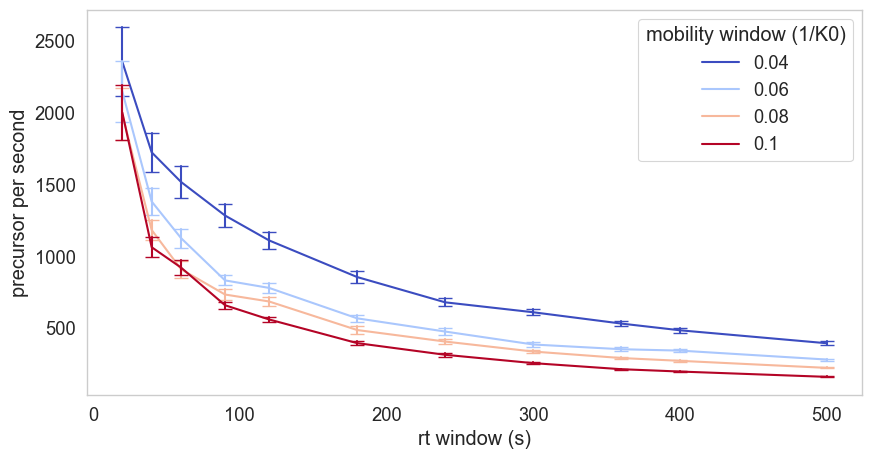

In [42]:
# plot the datapoints with error bars in seaborn
# remove the grid style
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=performance_df,
    x="rt_window",
    y="it/s",
    hue="mobility_window",
    err_style="bars", 
    errorbar=("se", 2),
    err_kws={'capsize':5},
    palette='coolwarm'
)
ax.set_xlabel('rt window (s)')
ax.set_ylabel('precursor per second')
plt.legend(title='mobility window (1/K0)')

fig.savefig(os.path.join(path, 'performance.png'), bbox_inches='tight', dpi=300)


In [15]:
size = 256*128
mflops = 4500

In [16]:
2*mflops/(5*size*np.log2(size))

0.003662109375

In [59]:
gaussian_filter = hybridselection.GaussianFilter(
            dia_data,
            kernel_size=20
        )

4:24:13.931934  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
4:24:13.932534  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
4:24:13.932885  INFO: Expected peak length in RT is 10.00 seconds, sigma is 3.61
4:24:13.933089  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20


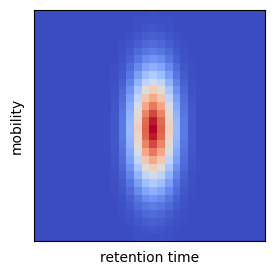

In [67]:


kernel = gaussian_filter.get_kernel()

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(kernel, cmap='coolwarm', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
fig.savefig(f'{path}/kernel.png', dpi=300)
plt.show()

In [36]:
features = []
decoy = []
rank = []
pidx = []

for eg in candidates:
    for c in eg.candidates:
        features.append(c.features)
        decoy.append(c.decoy)
        rank.append(c.rank)
        pidx.append(c.precursor_idx)
        
features = np.array(features)
decoy = np.array(decoy)
rank = np.array(rank)
pidx = np.array(pidx)

In [37]:
max_pidx = pidx.max()
candidate = pidx + max_pidx * rank

In [38]:
df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_07_v1.0.2/HeLa full proteome/alpha_psms.tsv', sep='\t')

In [39]:
candidate_df = df['precursor_idx'].values + max_pidx * df['rank'].values

In [40]:
#mask = np.isin(candidate, candidate_df)

In [58]:
np.float_

numpy.float64

In [41]:
features_masked = features#[mask]
decoy_masked = decoy#[mask]
rank_masked = rank#[mask]
pidx_masked = pidx#[mask]


In [42]:
qval_mask = np.isin(pidx_masked, df[df['qval'] < 0.01]['precursor_idx'].values)

In [35]:
pidx_masked

array([330413, 330406, 287908, ..., 113298, 162935, 287896])

In [34]:
qval_mask.shape

(58193,)

In [43]:
qval_mask.sum()
len(qval_mask)

2088871

In [25]:
decoy.sum()

1039254

1307970


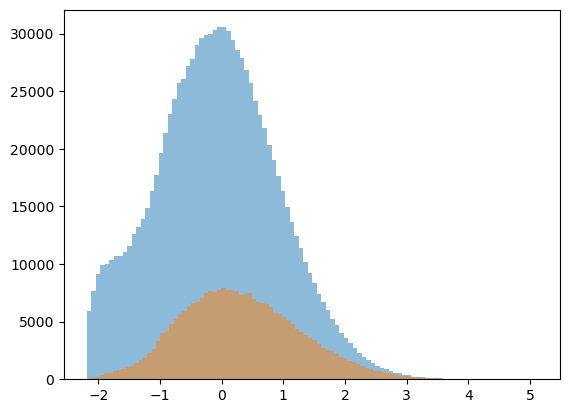

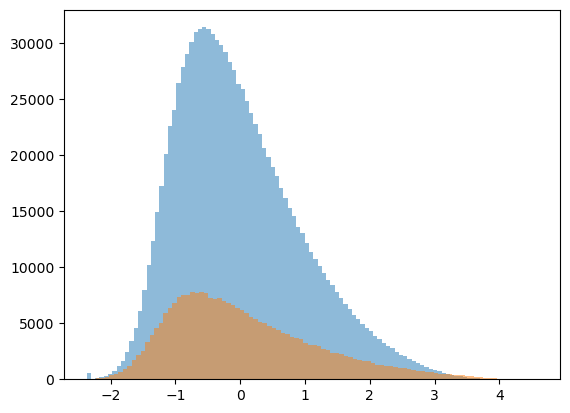

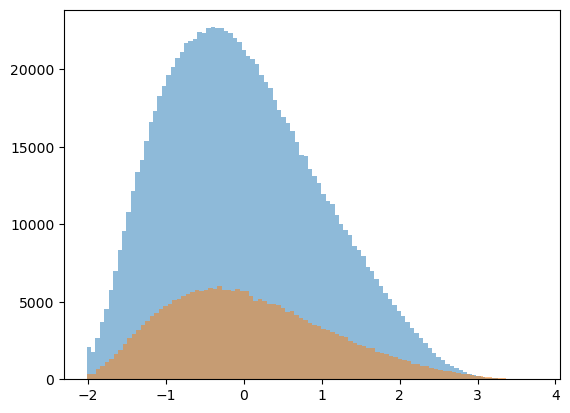

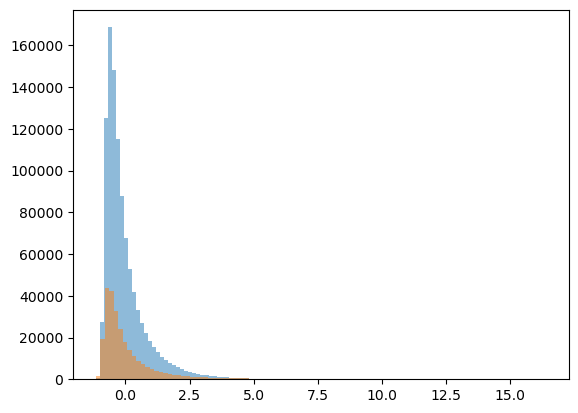

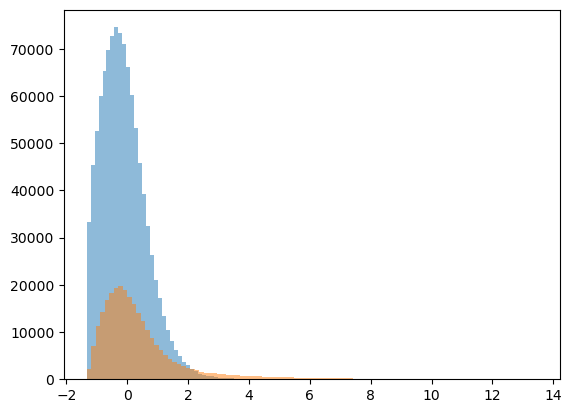

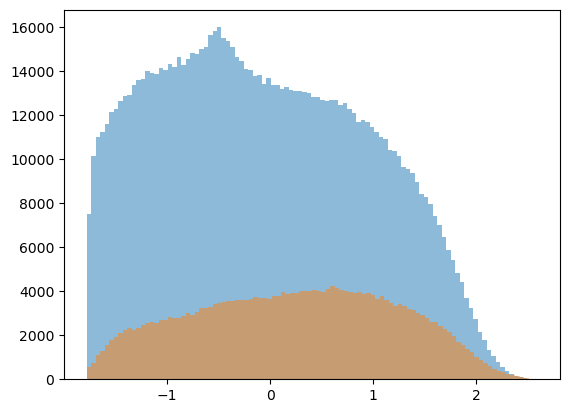

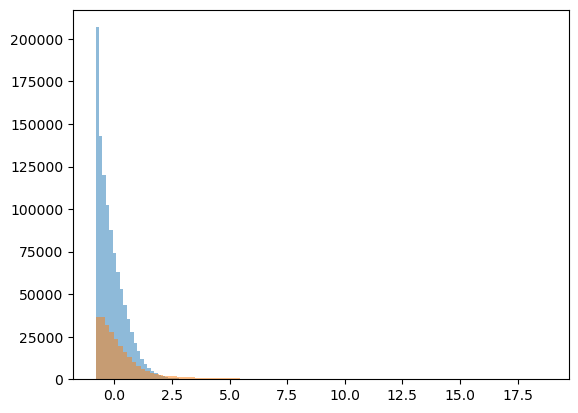

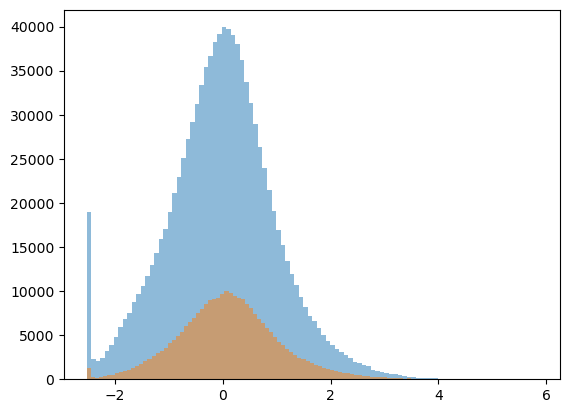

KeyboardInterrupt: 

In [45]:
from sklearn.linear_model import LogisticRegression


def train_classifier(features, decoy, qval_mask):
    # keep all decoys and targets within the qval mask
    to_keep = np.logical_or(decoy, qval_mask)
    features = features[to_keep]
    decoy = decoy[to_keep].astype(bool)

    print(len(features))

    mean = features.mean(axis=0, keepdims=True)
    std = features.std(axis=0, keepdims=True)

    # normalize features
    features = (features - mean)/std

    for i in range(features.shape[1]):
        plt.hist(features[decoy, i], bins=100, alpha=0.5, label='decoy')
        plt.hist(features[~decoy, i], bins=100, alpha=0.5, label='target')
        plt.show()

    # invert the decoy column
    decoy = ~decoy

    lr = LogisticRegression()
    lr.fit(features, decoy)
    print(lr.score(features, decoy))

    # print lr coefficients
    print(mean)
    print(std)
    print(lr.coef_)
    print(lr.intercept_)

train_classifier(features_masked, decoy_masked, qval_mask)


In [ ]:
0.7719351416881346
[[ 2.967344    1.2160938   1.426444   13.960179    0.06620345  0.44364494
   0.03138363  3.1453438 ]]
[[ 1.2583724   0.91052234  1.2126098  14.557817    0.04327635  0.24623954
   0.03225865  1.2671406 ]]
[[ 0.43898424  0.97879761  0.72262148 -0.22705527 -0.21353988  0.3174245
   0.30102549  0.44892641]]
[-0.22941813]

In [110]:
features_masked[:,3] = np.log(features_masked[:,3]+0.0001)
features_masked[:,4] = np.log(features_masked[:,4]+0.0001)

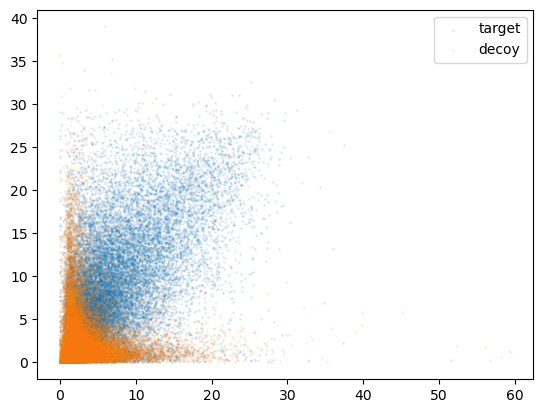

In [143]:
plt.scatter(features_masked[decoy_masked == 0,1], features_masked[decoy_masked == 0,6], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,1], features_masked[decoy_masked == 1,6], label='decoy', alpha=0.1, s=1)
plt.legend()

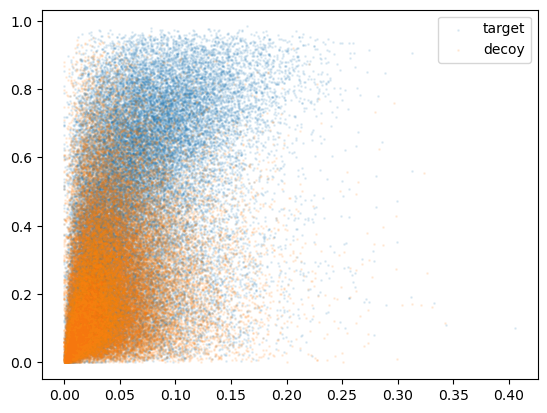

In [112]:
plt.scatter(features_masked[decoy_masked == 0,2], features_masked[decoy_masked == 0,7], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,2], features_masked[decoy_masked == 1,7], label='decoy', alpha=0.1, s=1)
plt.legend()

(array([9.400e+01, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        3.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 1.100e+01, 9.000e+00,
        1.000e+01, 1.900e+01, 1.400e+01, 2.700e+01, 2.400e+01, 2.300e+01,
        2.000e+01, 4.200e+01, 5.200e+01, 4.000e+01, 7.000e+01, 6.500e+01,
        9.200e+01, 1.090e+02, 1.640e+02, 1.730e+02, 1.750e+02, 2.730e+02,
        3.100e+02, 3.620e+02, 4.590e+02, 5.290e+02, 6.800e+02, 7.320e+02,
        9.150e+02, 1.063e+03, 1.318e+03, 1.451e+03, 1.692e+03, 1.928e+03,
        2.043e+03, 2.197e+03, 2.228e+03, 2.228e+03, 2.273e+03, 2.162e+03,
        2.125e+03, 1.793e+03, 1.773e+03, 1.569e+03, 1.396e+03, 1.252e+03,
        1.122e+03, 9.850e+02, 8.450e+02, 6.870e+02, 6.350e+02, 5.230e+02,
        4.510e+02, 3.550e+02, 3.250e+02, 2.470e+02, 1.930e+02, 1.630e+02,
        1.410e+02, 8.500e+01, 8.300e+0

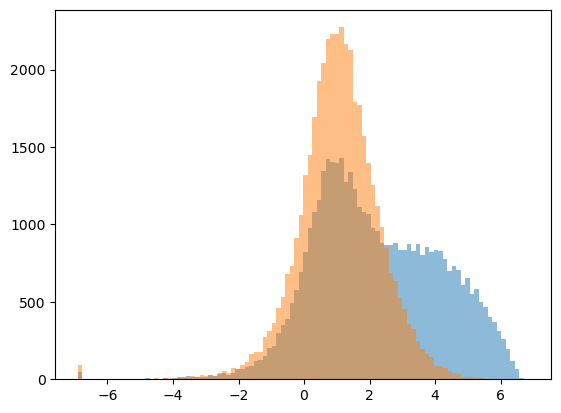

In [113]:
int_diff = np.log((features_masked[:,1] * features_masked[:,6])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

(array([178.,  83.,  53.,  49.,  59.,  58.,  59.,  59.,  52.,  63.,  41.,
         63.,  52.,  57.,  67.,  68.,  50.,  81.,  61.,  58.,  64.,  72.,
         71.,  81.,  84.,  82.,  69.,  76.,  82.,  97.,  81.,  70.,  94.,
         87., 104., 102., 116., 112., 100., 122.,  99.,  95., 104.,  91.,
         87.,  92., 109., 106.,  94., 103., 100., 101.,  83., 111.,  94.,
         91.,  92.,  79.,  76.,  79.,  56.,  61.,  64.,  66.,  55.,  59.,
         45.,  51.,  39.,  32.,  32.,  29.,  25.,  22.,  22.,  19.,  11.,
         12.,   9.,  12.,   9.,   8.,  10.,   3.,   4.,   3.,   5.,   5.,
          0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-6.9077554, -6.854499 , -6.8012424, -6.7479854, -6.694729 ,
        -6.6414723, -6.588216 , -6.534959 , -6.4817023, -6.428446 ,
        -6.3751893, -6.3219323, -6.268676 , -6.2154193, -6.162163 ,
        -6.108906 , -6.0556493, -6.002393 , -5.9491363, -5.8958793,
        -5.8426228, -5.7893662, -5.7361097, -5

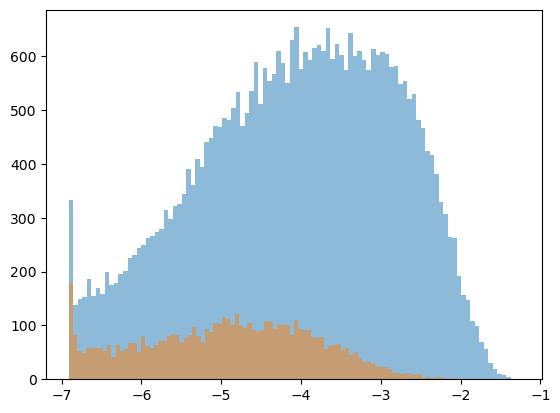

In [93]:
int_diff = np.log((features_masked[:,2] * features_masked[:,7])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

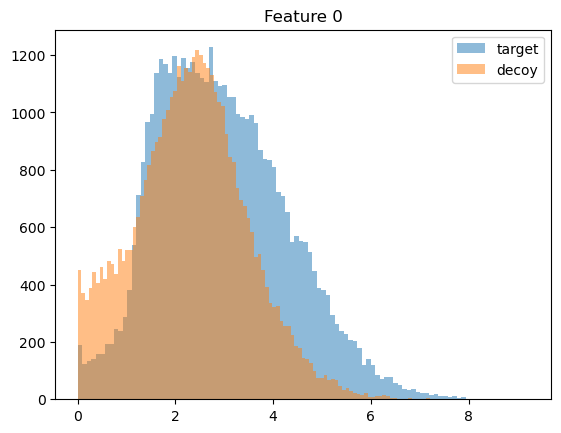

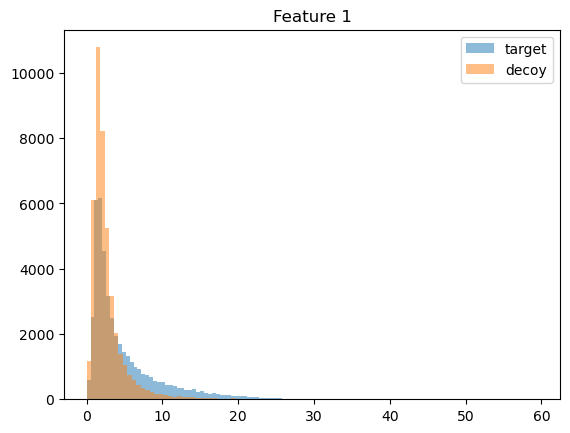

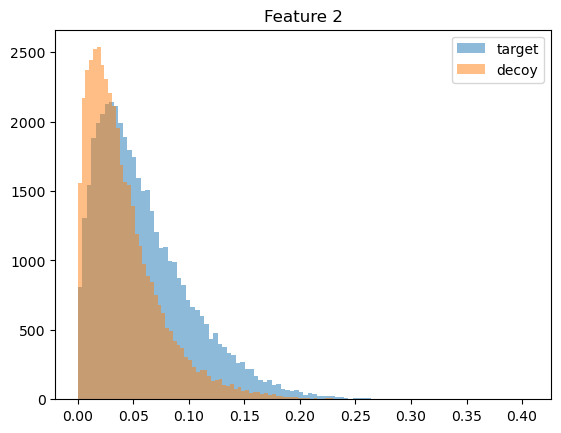

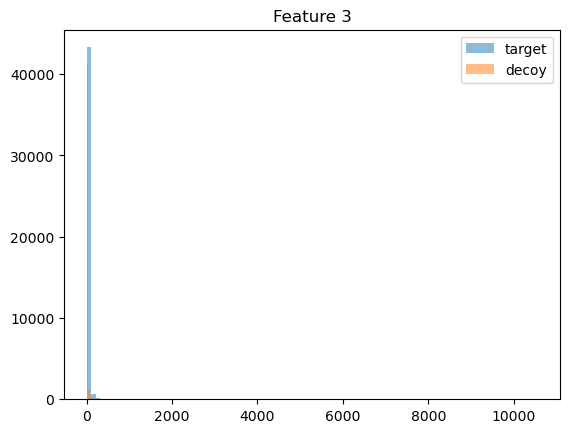

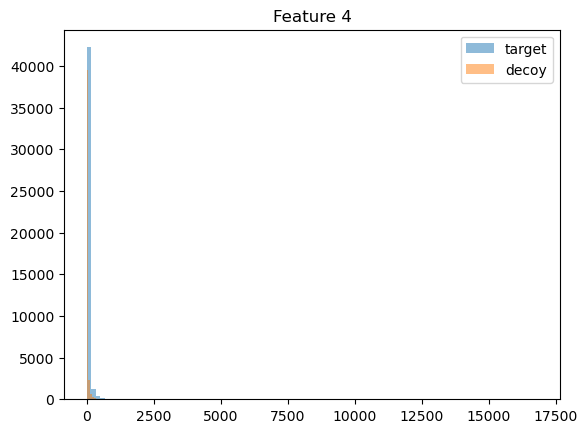

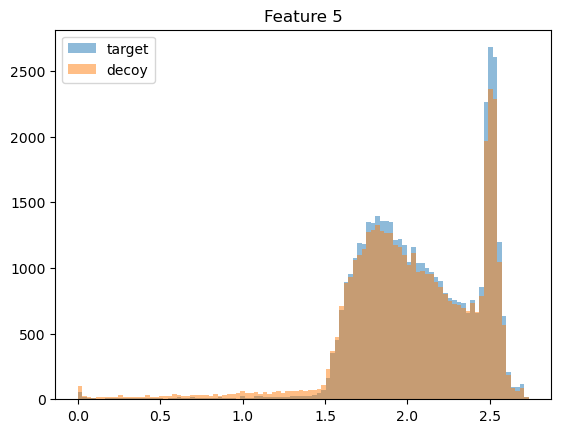

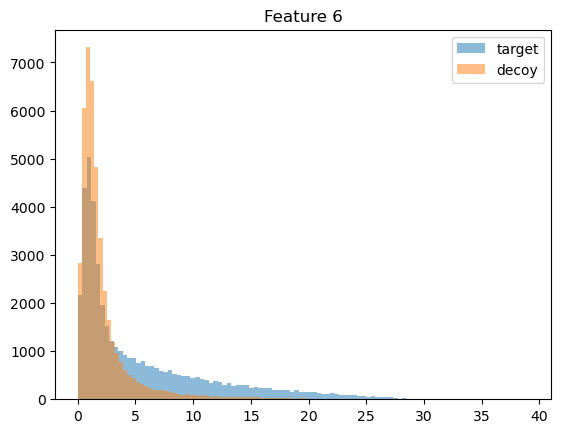

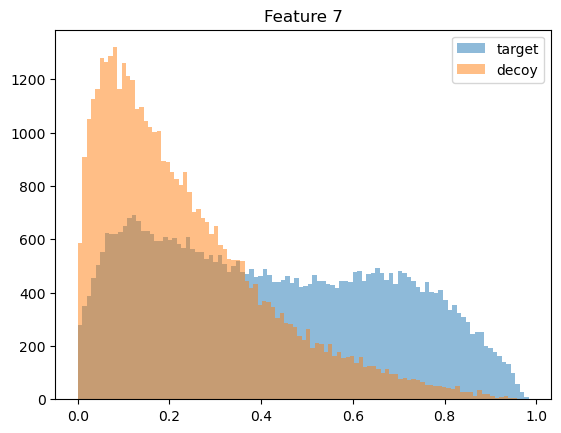

In [146]:
for i in range(features_masked.shape[1]):
    plt.figure()
    plt.hist(features_masked[decoy_masked == 0, i], label='target', bins=100, alpha=0.5)
    plt.hist(features_masked[decoy_masked == 1, i], label='decoy', bins=100, alpha=0.5)
    plt.legend()
    plt.title(f'Feature {i}')

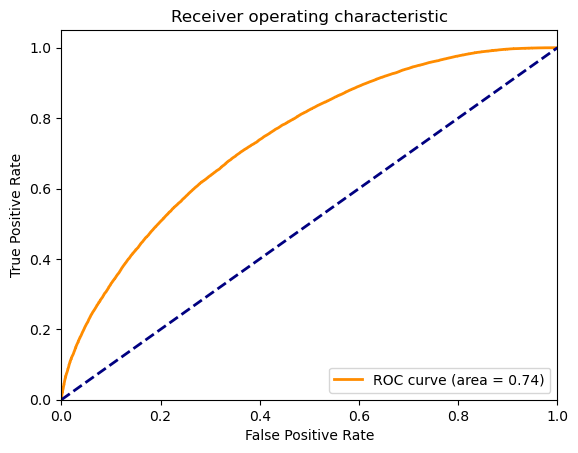

In [95]:
# train and validate a logistic regression model based on the features and decoy labels
from sklearn.linear_model import LogisticRegression
# MLP calssifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features_masked, decoy_masked, test_size=0.2, random_state=42)

sr = StandardScaler()
lr = MLPClassifier()

X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)


lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

# evaluiate the model by plotting the score distribution for the two classes (decoy and target)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
print(features.shape)

(414938, 8)


In [108]:
from alphadia.extraction import quadrupole
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [117]:
candidates['mz'] = candidates['precursor_mz']


  0%|          | 0/2 [00:00<?, ?it/s]

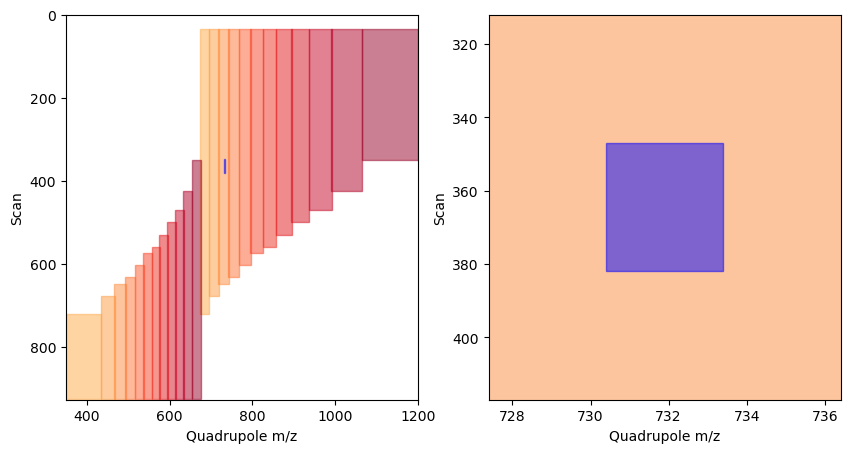

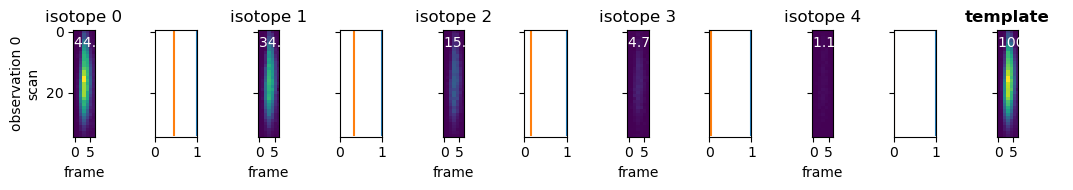

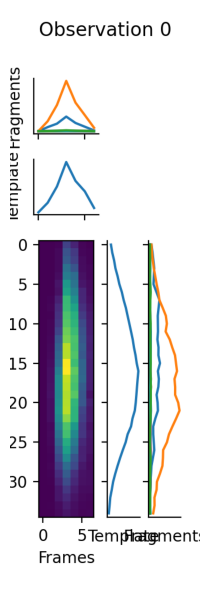

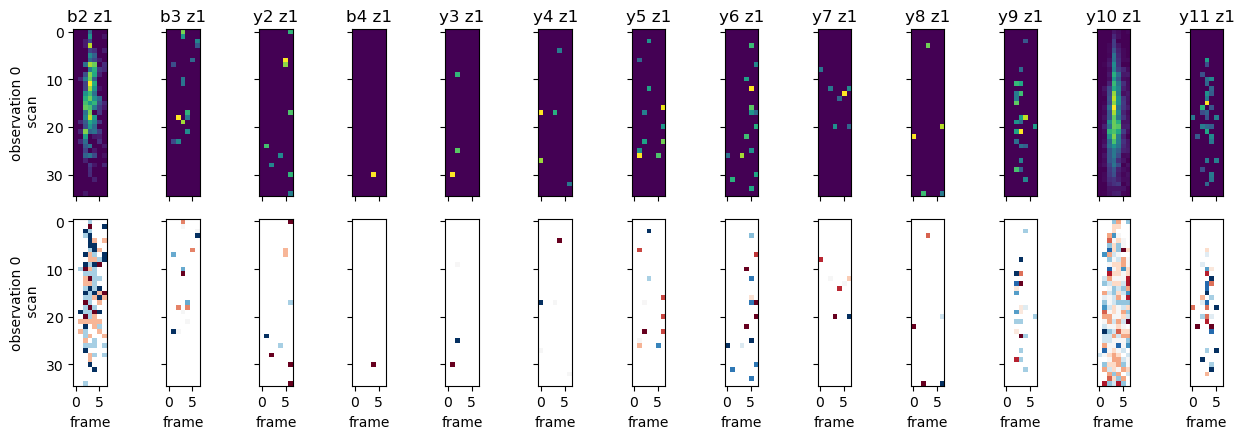

 50%|█████     | 1/2 [00:01<00:01,  1.28s/it]

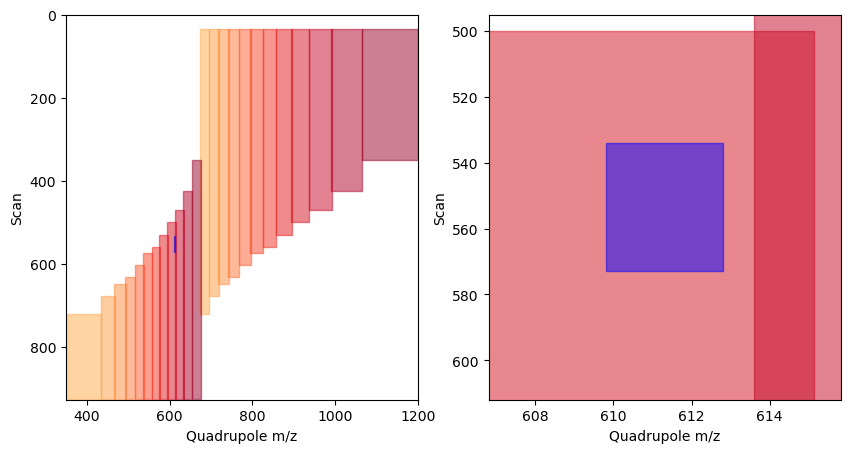

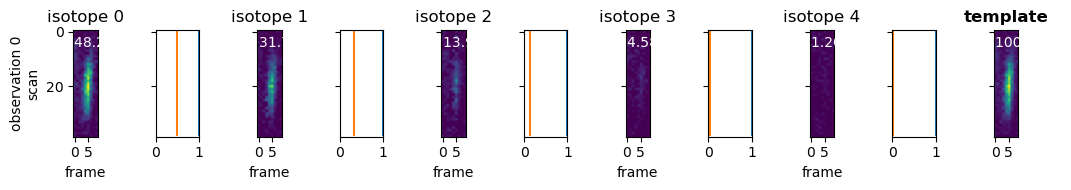

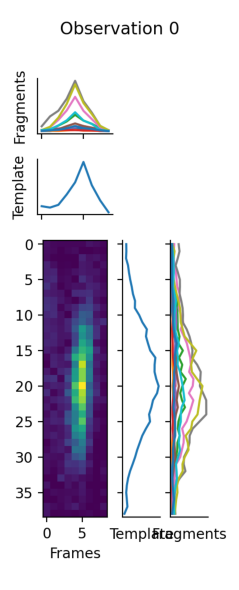

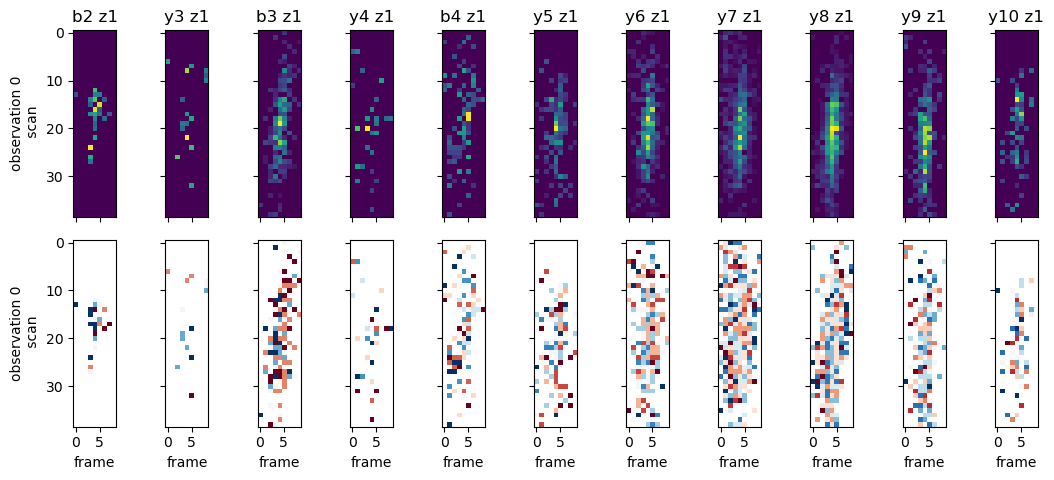

100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


In [119]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow

workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    fragment_mz_column='mz_calibrated',
    debug=True
)
psm = workflow()

In [111]:
psm

(   precursor_idx  elution_group_idx  charge  rank  precursor_mass_error  \
 0         230714                  2       2     0              2.743231   
 1         230714                  2       2     1              0.014830   
 2         230714                  2       2     2             -2.404601   
 3         230714                  2       2     3              1.964307   
 4         230715              76109       2     0              0.623978   
 5         230715              76109       2     1              0.971404   
 6         230715              76109       2     2              0.821897   
 7         230715              76109       2     3             -3.377354   
 8         230715              76109       2     4             -3.446375   
 
    mz_library  mz_observed  precursor_isotope_correlation  \
 0  730.896440   730.898438                       0.999893   
 1  730.896440   730.896423                       0.495449   
 2  730.896440   730.894653                       0.